# h5 모델을 tflite 변환 예제

In [5]:
from os.path import join

import pickle
import cv2
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

In [6]:
def img_2_inputx(img, input_shape):
    """
    convert opencv image to input x
    Args:
        img: opencv image
    Returns:
        input_x: model input x
    """
    img = cv2.resize(img,input_shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #-0.5
    input_x = np.expand_dims(img,axis=0)/255.
    return input_x

In [10]:
load_ckp_filepath = "./train_info/0322_0058/best_model.h5"  #ckp_filepath 
load_model = tf.keras.models.load_model(load_ckp_filepath)

load_model.trainable=False
converter = tf.lite.TFLiteConverter.from_keras_model(load_model)
tflite_model = converter.convert()



In [11]:
# Save tflite.
save_traininfo_dir ="./train_info/0322_0058/"
tflite_model_path = join(save_traininfo_dir, "best_model.tflite")
print("tflite_model_path: ", tflite_model_path)
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)
    
load_traininfo_dir = save_traininfo_dir
load_class_int2char_path = join(load_traininfo_dir,"class_int2char.pkl")
# class_int2char = {0: 'a0', 1: 'b1', 2: 'bc1', 3: 'bg', 4: 'c1'}
with open(load_class_int2char_path, 'rb') as handle:
    class_int2char = pickle.load(handle)
print("class_int2char: ", class_int2char)

model_content = True
if model_content:
    interpreter = tf.lite.Interpreter(model_content=tflite_model)
else:
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    
interpreter.allocate_tensors()

input1 = interpreter.get_input_details()[0]  # Model has single input.
output = interpreter.get_output_details()[0]  # Model has single output.

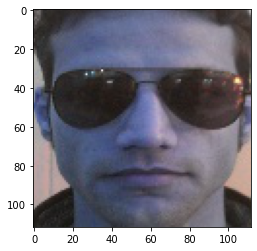

class:  b1


In [9]:
img_size = 112
sample_img = cv2.imread('./data/face_datasets_5/test/b1/1_1_0_crop_14c68a1c36.jpg')

input_data = img_2_inputx(sample_img, (img_size,img_size))
input_data = np.array(input_data, dtype=np.float32)
interpreter.set_tensor(input1['index'], input_data)
interpreter.invoke()

plt.imshow(sample_img)
plt.show()

# out_predict = interpreter.get_tensor(output[1]['index'])
out_predict = interpreter.get_tensor(output['index'])
label_class = out_predict[0]
print("class: ", class_int2char[np.argmax(label_class)])